In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
 

In [2]:
results_participants = pd.read_csv('participant_results.csv')
correct_answers = pd.read_csv('correct_answers.csv')

In [3]:
accuracy_VAE = []
for i in range(results_participants.shape[0]):
    
    participant_correct_answers = np.sum(results_participants.iloc[i,2:32].to_numpy() == correct_answers.iloc[0:30,1])
    participant_total_answers = np.sum(results_participants.iloc[i,2:32]>0)
    accuracy_VAE.append(participant_correct_answers/participant_total_answers)

In [4]:
results_participants['accuracy_VAE'] = accuracy_VAE

In [5]:
accuracy_random = []
for i in range(results_participants.shape[0]):
    
    participant_correct_answers = np.sum(results_participants.iloc[i,32:62].to_numpy() == correct_answers.iloc[30:60,1])
    participant_total_answers = np.sum(results_participants.iloc[i,32:62]>0)
    accuracy_random.append(participant_correct_answers/participant_total_answers)

In [6]:
results_participants['accuracy_random'] = accuracy_random

In [7]:
results_participants['accuracy_random'].mean()
results_participants['accuracy_VAE'].mean()

0.537861058694392

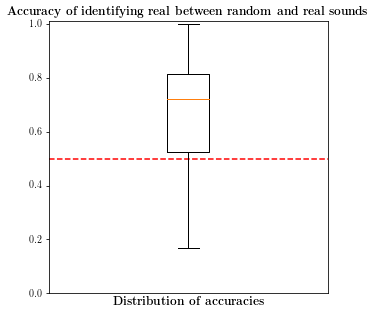

In [13]:
# plt.boxplot([accuracy_random,accuracy_VAE])
plt.figure(figsize=(5,5))
plt.boxplot(accuracy_random)
plt.title(r'\textbf{Accuracy of identifying real between random and real sounds}', fontsize=12)
plt.xlabel(r'\textbf{Distribution of accuracies}', fontsize=12)
plt.xticks([])
plt.ylim(0,1.01)
plt.hlines(y=0.5, xmin=0.5, xmax=1.5,colors='r', linestyles='dashed')
plt.savefig('random_vs_real.pdf', bbox_inches='tight')
plt.show()

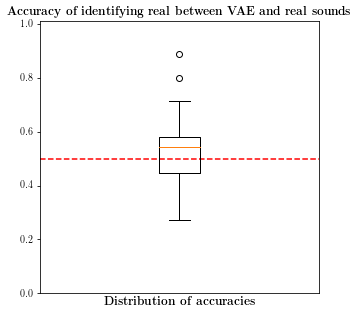

In [10]:
plt.figure(figsize=[5,5])
plt.boxplot(accuracy_VAE)
plt.title(r'\textbf{Accuracy of identifying real between VAE and real sounds}',fontsize=12)
plt.xlabel(r'\textbf{Distribution of accuracies}',fontsize=12)
plt.ylim(0,1.01)
plt.xticks([])
plt.hlines(y=0.5, xmin=0.5, xmax=1.5,colors='r', linestyles='dashed')
plt.savefig('VAE_vs_real.pdf' ,bbox_inches='tight')
plt.show()
